<a href="https://colab.research.google.com/github/AjinkyaSar/financial-analytics-projects/blob/main/Stock_Market_Analysis_%E2%80%93_ARIMA_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ARIMA = Random Walk Method

In [1]:
import pandas as pd
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/SP_500.csv')
display(df.head())

,Date,Close
0,29-06-2015,2057.639893
1,30-06-2015,2063.110107
2,1/7/2015,2077.419922
3,2/7/2015,2076.780029
4,6/7/2015,2068.760010


In [3]:
def convert_date(date_str):
    for fmt in ('%d-%m-%Y', '%m/%d/%Y', '%d/%m/%Y'):
        try:
            return pd.to_datetime(date_str, format=fmt).strftime('%d/%m/%Y')
        except ValueError:
            pass
    return None # Or the original date_str if you prefer

df['Date'] = df['Date'].apply(convert_date)
display(df.head())

,Date,Close
0,29/06/2015,2057.639893
1,30/06/2015,2063.110107
2,07/01/2015,2077.419922
3,07/02/2015,2076.780029
4,07/06/2015,2068.760010


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.set_index('Date', inplace=True)
df['Close'] = pd.to_numeric(df['Close'])
display(df.head())

,Close
Date,
2015-06-29,2057.639893
2015-06-30,2063.110107
2015-01-07,2077.419922
2015-02-07,2076.780029
2015-06-07,2068.760010


In [5]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if result[1] <= 0.05:
    print("The time series is likely stationary (reject the null hypothesis).")
else:
    print("The time series is likely non-stationary (fail to reject the null hypothesis).")

ADF Statistic: -1.491562
p-value: 0.537681
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
The time series is likely non-stationary (fail to reject the null hypothesis).


In [6]:
df['Close_diff'] = df['Close'].diff()
df.dropna(inplace=True) # Drop the first row which will have a NaN after differentiation
display(df.head())

,Close,Close_diff
Date,,
2015-06-30,2063.110107,5.470214
2015-01-07,2077.419922,14.309815
2015-02-07,2076.780029,-0.639893
2015-06-07,2068.760010,-8.020019
2015-07-07,2081.340088,12.580078


In [7]:
from statsmodels.tsa.stattools import adfuller

result_diff = adfuller(df['Close_diff'])
print('ADF Statistic (Differenced): %f' % result_diff[0])
print('p-value (Differenced): %f' % result_diff[1])
print('Critical Values (Differenced):')
for key, value in result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results for the differenced series
if result_diff[1] <= 0.05:
    print("The differenced time series is likely stationary (reject the null hypothesis).")
else:
    print("The differenced time series is likely non-stationary (fail to reject the null hypothesis).")

ADF Statistic (Differenced): -10.320537
p-value (Differenced): 0.000000
Critical Values (Differenced):
	1%: -3.436
	5%: -2.864
	10%: -2.568
The differenced time series is likely stationary (reject the null hypothesis).


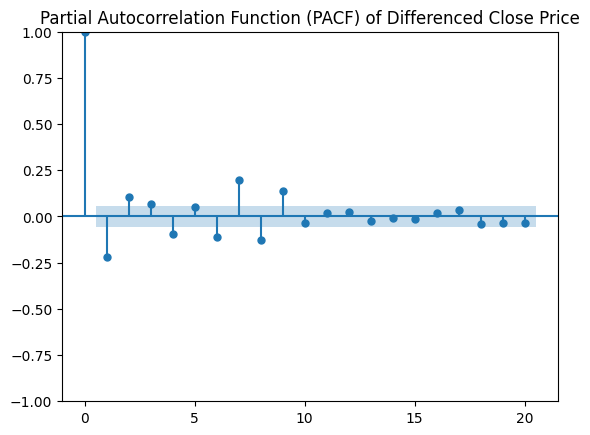

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

plot_pacf(df['Close_diff'], lags=20)
plt.title('Partial Autocorrelation Function (PACF) of Differenced Close Price')
plt.show()

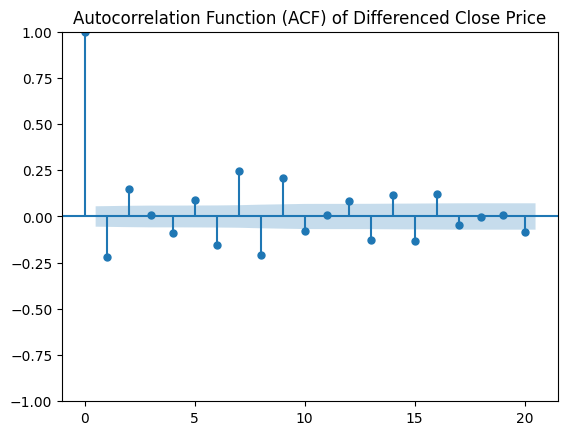

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(df['Close_diff'], lags=20)
plt.title('Autocorrelation Function (ACF) of Differenced Close Price')
plt.show()

p= 1,2,3,4

d= 1

q= 1,2,4,5

In [10]:
!pip uninstall numpy -y
!pip install numpy==1.26.4

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 67.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [11]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.3 MB/s eta 0:00:00


In [5]:
from pmdarima import auto_arima

# Fit auto_arima to the 'Close' column
# We use the original 'Close' column and let auto_arima find the differencing order (d)
model = auto_arima(df['Close'], seasonal=False, stepwise=True, suppress_warnings=True, error_action='ignore', max_p=5, max_q=5)

# Print the model summary
print(model.summary())

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1259
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -6044.775
Date:                Tue, 16 Sep 2025   AIC                          12101.549
Time:                        04:48:21   BIC                          12132.373
Sample:                             0   HQIC                         12113.133
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7060      0.029    -58.187      0.000      -1.763      -1.649
ar.L2         -0.8332      0.041    -20.219      0.000      -0.914      -0.752
ar.L3          0.0280      0.018      1.583      0.1

In [6]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
# order=(p, d, q) where p is the AR order, d is the differencing order, and q is the MA order.
arima_model = ARIMA(df['Close'], order=(2, 1, 2))
arima_result = arima_model.fit()

# Print the model summary
print(arima_result.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1259
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6093.717
Date:                Tue, 16 Sep 2025   AIC                          12197.434
Time:                        04:48:28   BIC                          12223.120
Sample:                             0   HQIC                         12207.087
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2439      0.114     -2.136      0.033      -0.468      -0.020
ar.L2         -0.2020      0.081     -2.493      0.013      -0.361      -0.043
ma.L1          0.0477      0.117      0.408      0.6

In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
# order=(p, d, q) where p is the AR order, d is the differencing order, and q is the MA order.
arima_model = ARIMA(df['Close'], order=(2, 1, 1))
arima_result = arima_model.fit()

# Print the model summary
print(arima_result.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1259
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -6097.442
Date:                Tue, 16 Sep 2025   AIC                          12202.884
Time:                        04:48:31   BIC                          12223.433
Sample:                             0   HQIC                         12210.607
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0264      0.083      0.317      0.751      -0.136       0.189
ar.L2          0.1603      0.019      8.361      0.000       0.123       0.198
ma.L1         -0.2224      0.085     -2.625      0.0

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
# order=(p, d, q) where p is the AR order, d is the differencing order, and q is the MA order.
arima_model = ARIMA(df['Close'], order=(1, 1, 1))
arima_result = arima_model.fit()

# Print the model summary
print(arima_result.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1259
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6101.980
Date:                Tue, 16 Sep 2025   AIC                          12209.959
Time:                        04:48:35   BIC                          12225.371
Sample:                             0   HQIC                         12215.751
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4446      0.034    -12.919      0.000      -0.512      -0.377
ma.L1          0.2322      0.038      6.070      0.000       0.157       0.307
sigma2       956.3654     11.977     79.853      0.0

In [9]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
# order=(p, d, q) where p is the AR order, d is the differencing order, and q is the MA order.
arima_model = ARIMA(df['Close'], order=(0, 1, 1))
arima_result = arima_model.fit()

# Print the model summary
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1259
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -6112.276
Date:                Tue, 16 Sep 2025   AIC                          12228.552
Time:                        04:48:38   BIC                          12238.826
Sample:                             0   HQIC                         12232.413
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1727      0.010    -17.368      0.000      -0.192      -0.153
sigma2       974.4360     11.888     81.969      0.000     951.136     997.736
Ljung-Box (L1) (Q):                   0.95   Jarque-

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsm

In [10]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Fit the ARIMA(0, 1, 1) model
arima_model_011 = ARIMA(df['Close'], order=(0, 1, 1))
arima_result_011 = arima_model_011.fit()

# Print the model summary
print(arima_result_011.summary())

# Perform Ljung-Box test on the residuals
print("Ljung-Box test on residuals:")
print(sm.stats.acorr_ljungbox(arima_result_011.resid, lags=[20]))

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1259
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -6112.276
Date:                Tue, 16 Sep 2025   AIC                          12228.552
Time:                        04:48:44   BIC                          12238.826
Sample:                             0   HQIC                         12232.413
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1727      0.010    -17.368      0.000      -0.192      -0.153
sigma2       974.4360     11.888     81.969      0.000     951.136     997.736
Ljung-Box (L1) (Q):                   0.95   Jarque-

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsm

In [11]:
import statsmodels.api as sm

# Assuming arima_result_011 is the fitted ARIMA(0, 1, 1) model result
# Perform Box-Pierce test on the residuals
print("Box-Pierce test on residuals:")
print(sm.stats.acorr_ljungbox(arima_result_011.resid, lags=[20], boxpierce=True))

Box-Pierce test on residuals:
      lb_stat  lb_pvalue    bp_stat  bp_pvalue
20  14.845056   0.785204  14.722221   0.792075


In [12]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Fit the ARIMA(0, 1, 1) model
arima_model_011 = ARIMA(df['Close'], order=(1, 1, 1))
arima_result_011 = arima_model_011.fit()

# Print the model summary
print(arima_result_011.summary())

# Perform Ljung-Box test on the residuals
print("Ljung-Box test on residuals:")
print(sm.stats.acorr_ljungbox(arima_result_011.resid, lags=[20]))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1259
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6101.980
Date:                Tue, 16 Sep 2025   AIC                          12209.959
Time:                        04:48:50   BIC                          12225.371
Sample:                             0   HQIC                         12215.751
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4446      0.034    -12.919      0.000      -0.512      -0.377
ma.L1          0.2322      0.038      6.070      0.000       0.157       0.307
sigma2       956.3654     11.977     79.853      0.0

In [13]:
# Assuming arima_result_011 is the fitted ARIMA(1, 1, 1) model result from cell 4RLd8jXhdLmM
forecast_result = arima_result_011.forecast(steps=5)

print("Forecast for the next 5 days:")
print(forecast_result)

Forecast for the next 5 days:
1259    3027.515286
1260    3019.306098
1261    3022.955700
1262    3021.333177
1263    3022.054511
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
